# Credit Card Customer Segmentation

## Goal
This project is to develop a customer segamentation to define marketing strategy

###### Dataset
The dataset is originated from Kaggle - [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata)

The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

### Data Information

|| **Variable**    | **Description** |
|:---| :---        |    :---     |
|1| CUSTID | Identification of Credit Card holder (Categorical) |
|2| BALANCE | Balance amount left in their account to make purchases |
|3| BALANCEFREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
|4| PURCHASES | Amount of purchases made from account |
|5| ONEOFFPURCHASES | Maximum purchase amount done in one-go |
|6| INSTALLMENTSPURCHASES | Amount of purchase done in installment |
|7| CASHADVANCE | Cash in advance given by the user |
|8| PURCHASESFREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
|9| ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
|10| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
|11| CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
|12| CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
|13| PURCHASESTRX | Number of purchase transactions made |
|14| CREDITLIMIT | Limit of Credit Card for user |
|15| PAYMENTS | Amount of Payment done by user | 
|16| MINIMUM_PAYMENTS | Minimum amount of payments made by user |
|17| PRCFULLPAYMENT | Percent of full payment paid by user |
|18| TENURE | Tenure of credit card service for user |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv("./Credit-Card.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

In [5]:
info = {
    'CUSTID': 'Identification of Credit Card holder (Categorical)',
    'BALANCE': 'Balance amount left in their account to make purchases',
    'BALANCEFREQUENCY': 'How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)',
    'PURCHASES': 'Amount of purchases made from account',
    'ONEOFFPURCHASES': 'Maximum purchase amount done in one-go',
    'INSTALLMENTSPURCHASES': 'Amount of purchase done in installment',
    'CASHADVANCE': 'Cash in advance given by the user',
    'PURCHASESFREQUENCY': 'How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)',
    'ONEOFFPURCHASESFREQUENCY': 'How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)',
    'PURCHASESINSTALLMENTSFREQUENCY': 'How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)',
    'CASHADVANCEFREQUENCY': 'How frequently the cash in advance being paid',
    'CASHADVANCETRX': 'Number of Transactions made with "Cash in Advanced',
    'PURCHASESTRX': 'Number of purchase transactions made',
    'CREDITLIMIT': 'Limit of Credit Card for user',
    'PAYMENTS': 'Amount of Payment done by user',
    'MINIMUM_PAYMENTS': 'Minimum amount of payments made by user',
    'PRCFULLPAYMENT': 'Percent of full payment paid by user',
    'TENURE': 'Tenure of credit card service for user'
}

# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
df = data.drop("CUST_ID", axis=1)

In [9]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

In [11]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Exploratory Data Analysis (EDA)

In [12]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [13]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

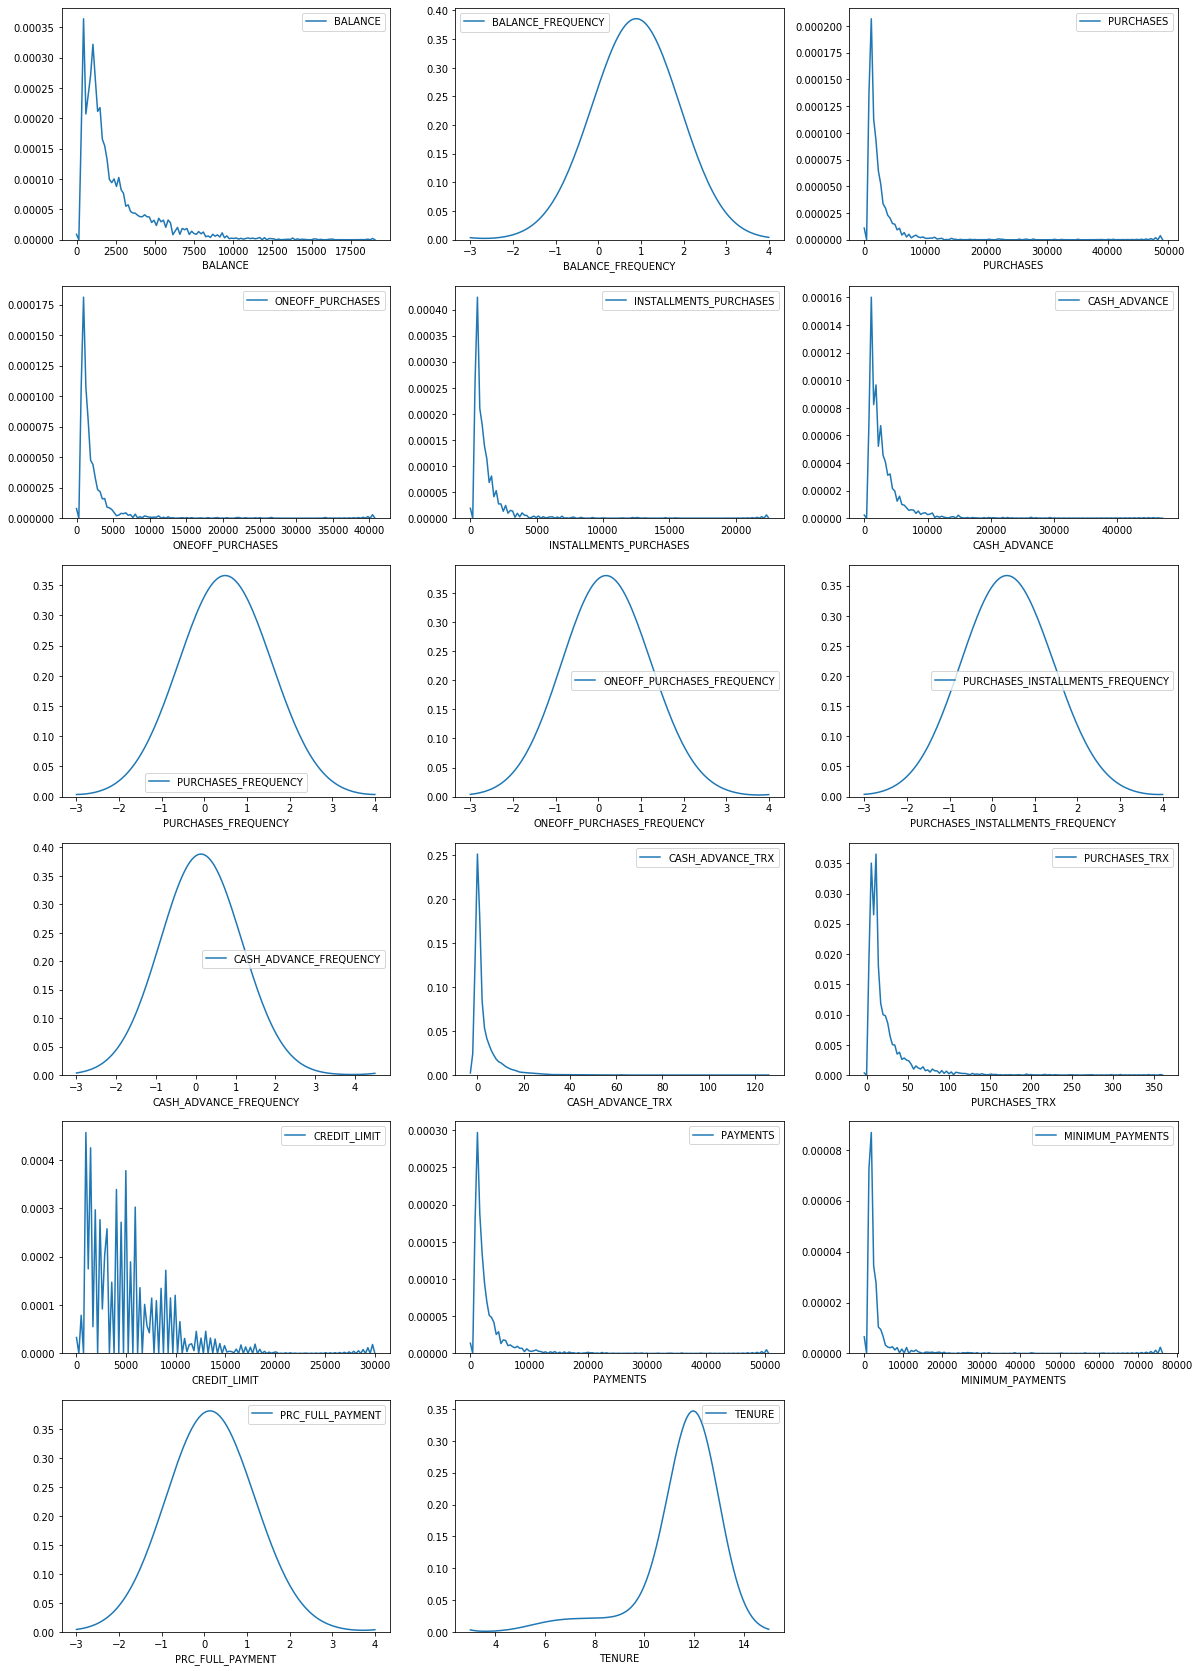

In [14]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(df[col], ax=ax, bw=1)
    plt.xlabel(col)


In [15]:
df_cuberoot = pd.DataFrame()
for col in cols:
    df_cuberoot[col] = (df[col])**(1/3)

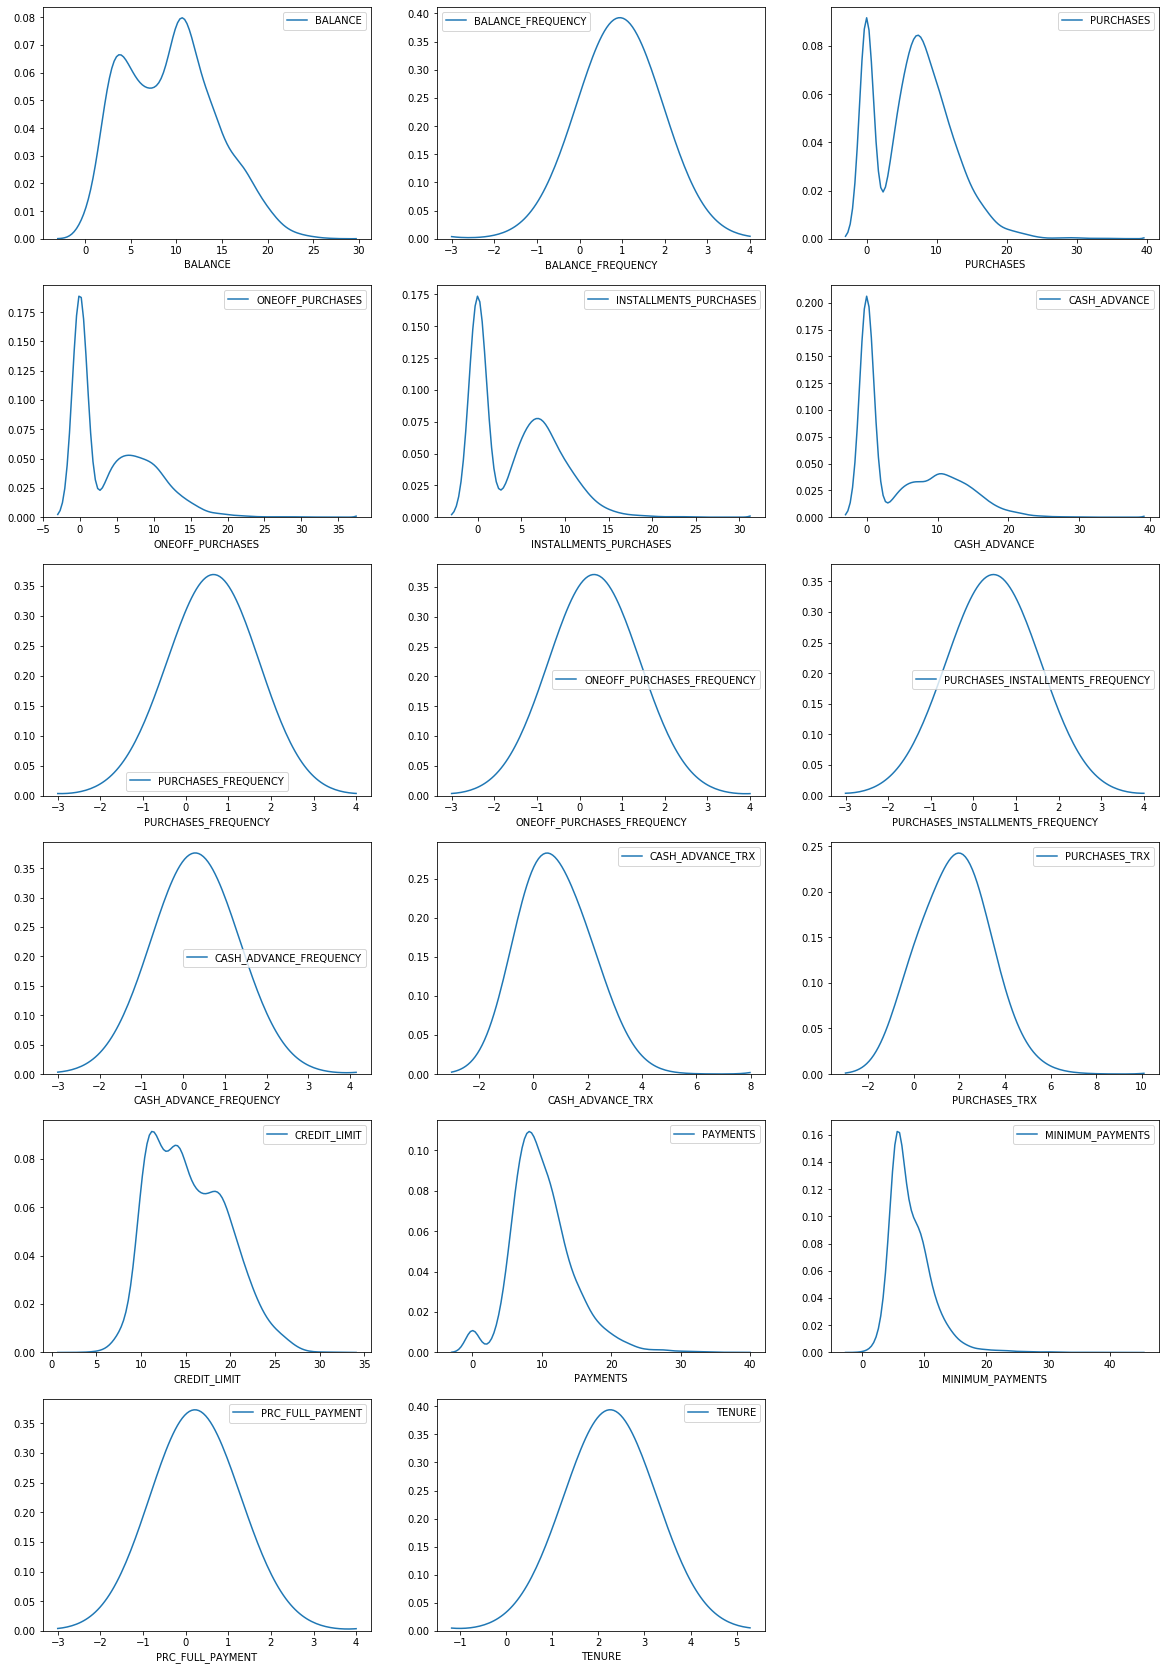

In [16]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(df_cuberoot[col], ax=ax, bw=1)
    plt.xlabel(col)

In [17]:
df_log = pd.DataFrame()
for col in cols:
    df_log[col] = np.log(1 + df[col])

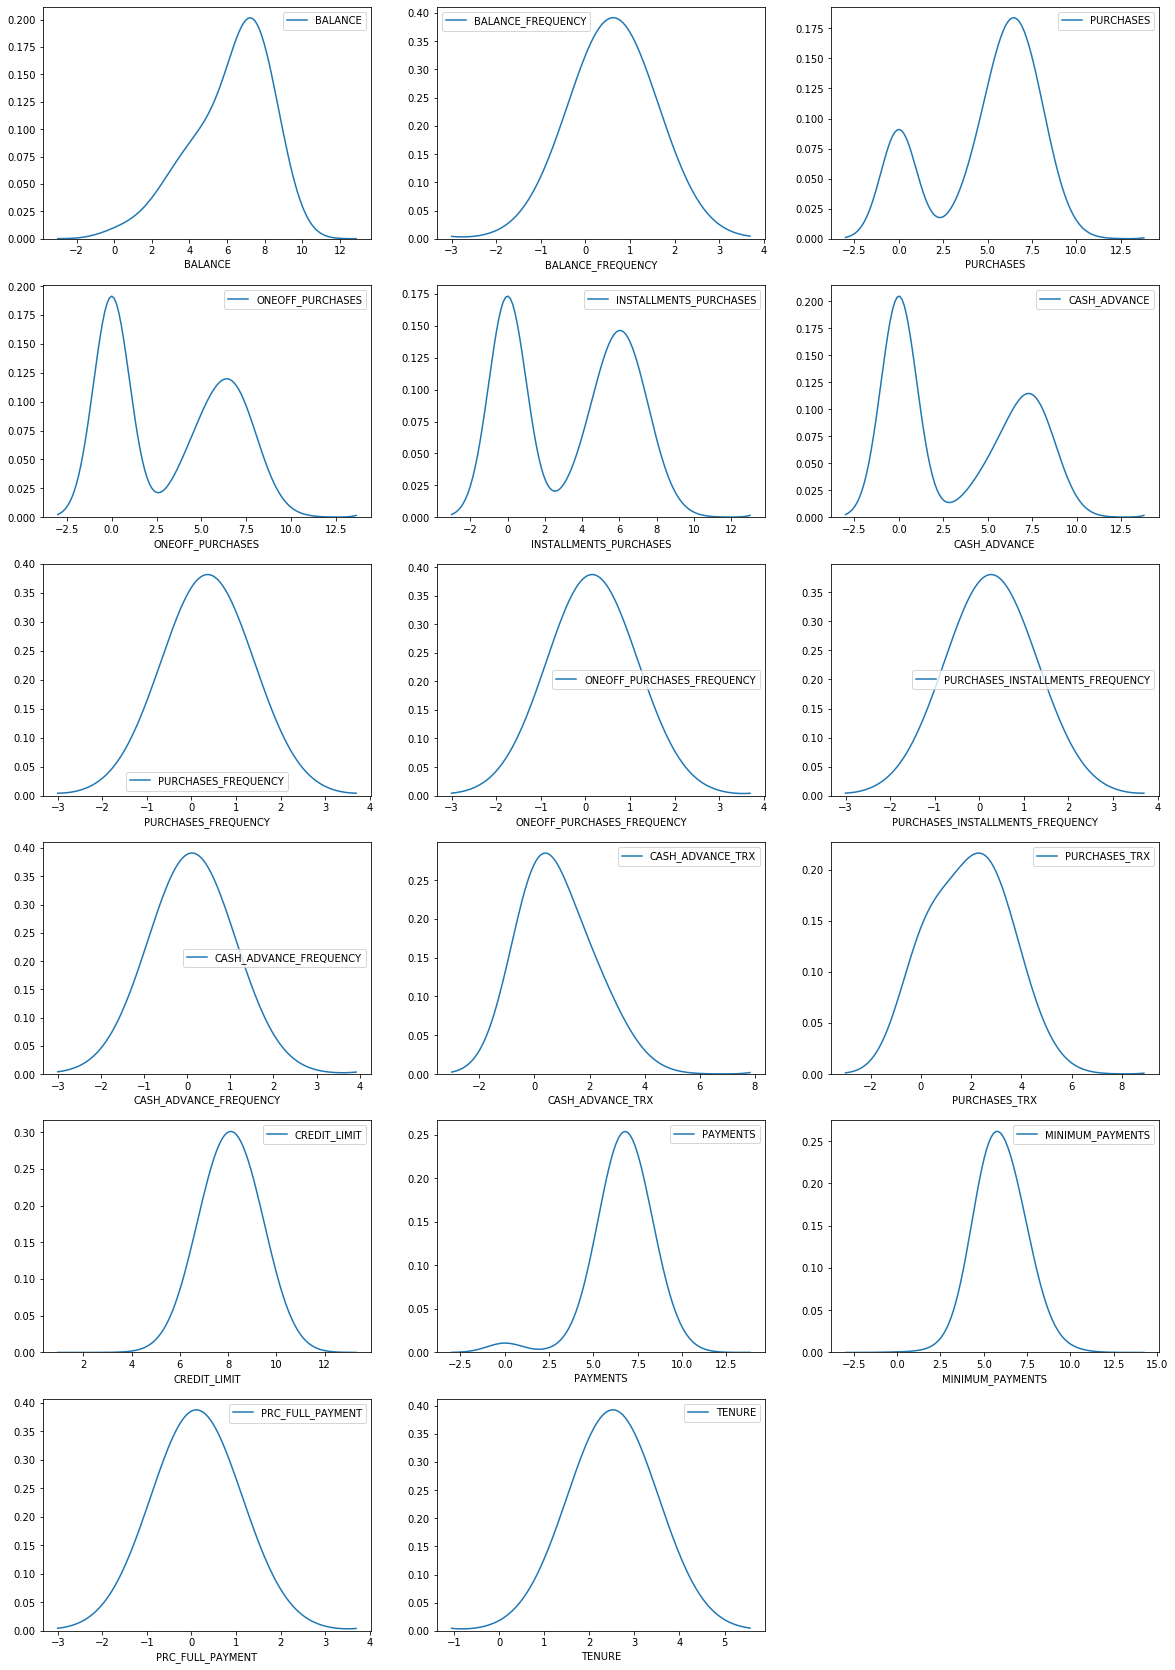

In [18]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(df_log[col], ax=ax, bw=1)
    plt.xlabel(col)

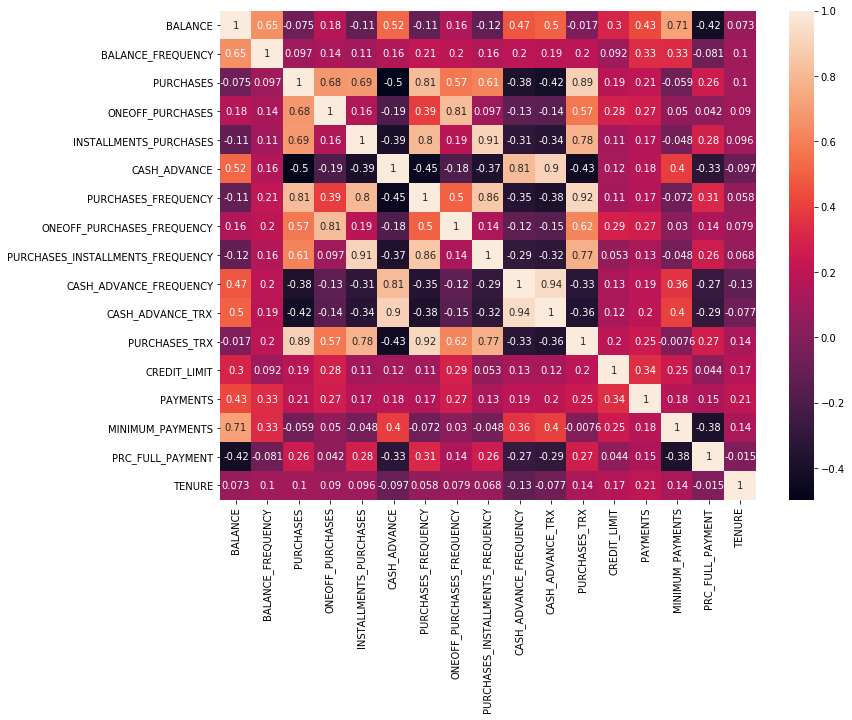

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(df_log.corr(), annot=True)

# Model Training

## PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df_log)

In [22]:
X_red.shape

(8950, 5)

In [23]:
df.shape

(8950, 17)

## Kmeans Clustering

Text(0, 0.5, 'WCSS')

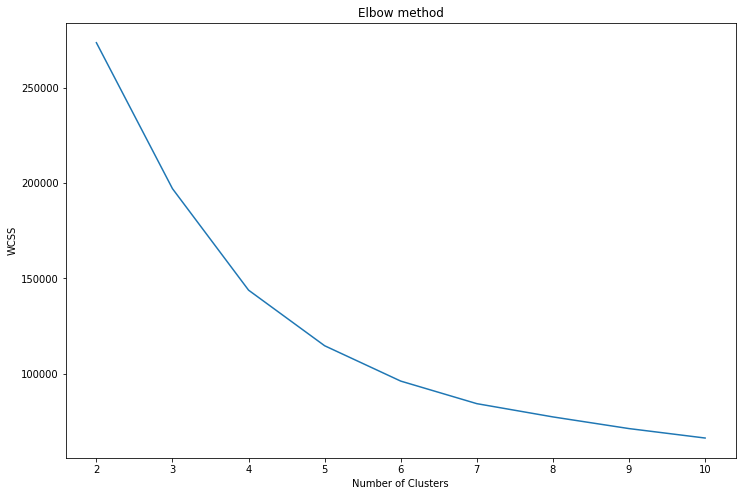

In [24]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X_red) for k in range(2, 11)]
innertia = [model.inertia_ for model in kmeans_models]
plt.figure(figsize=(12,8))
plt.plot(range(2, 11), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhoutte score')

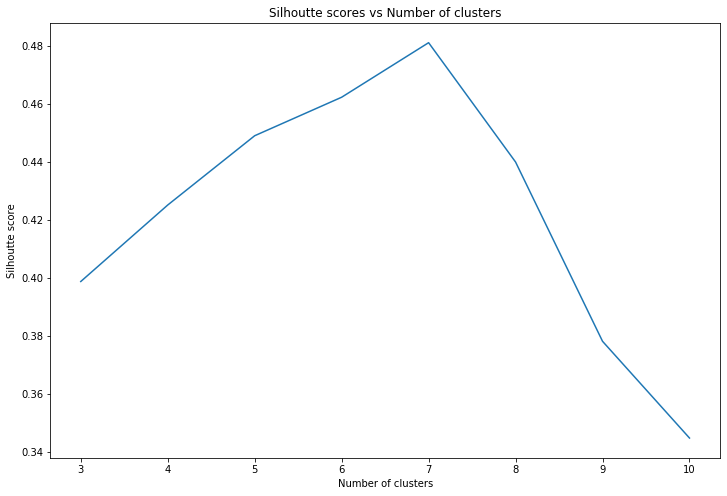

In [25]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:]]
plt.figure(figsize=(12,8))
plt.plot(range(3, 11), silhoutte_scores)
# plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')


In [26]:
'''
idx
3 -> 5 clusters
4 -> 6 clusters
5 -> 7 clusters
'''
selected_model = kmeans_models[3]

In [27]:
df_log["Clusters"] = selected_model.labels_

In [28]:
df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,2
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,3
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949,3
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,3


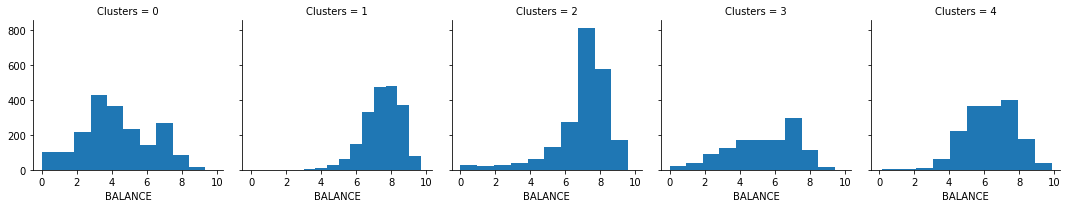

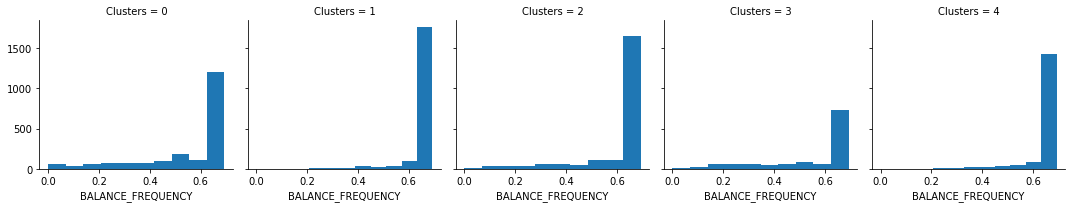

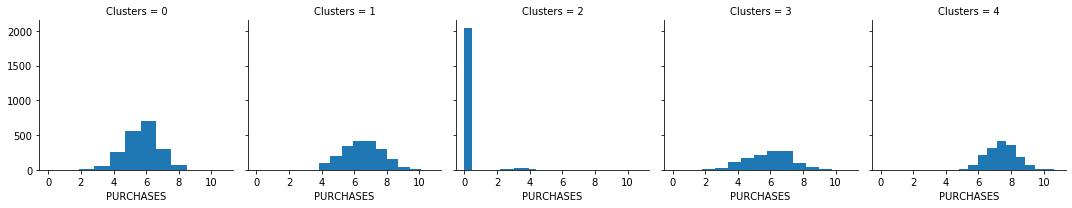

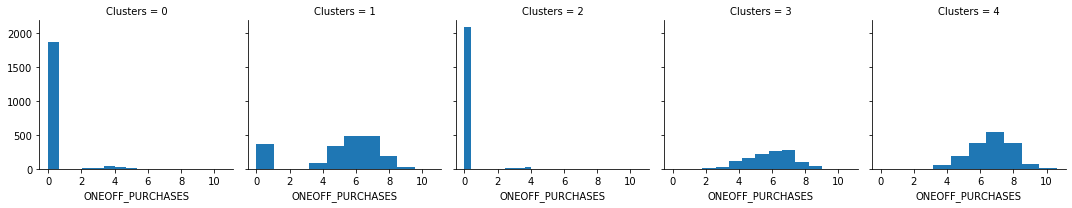

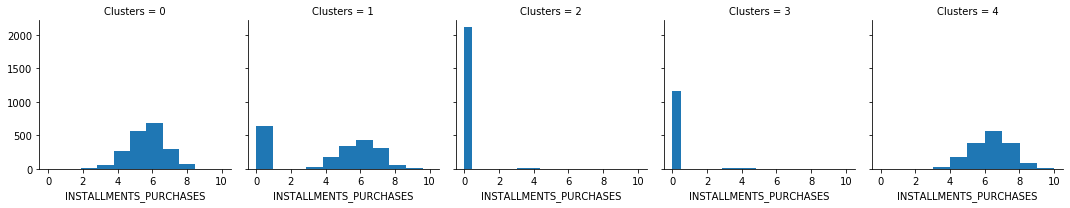

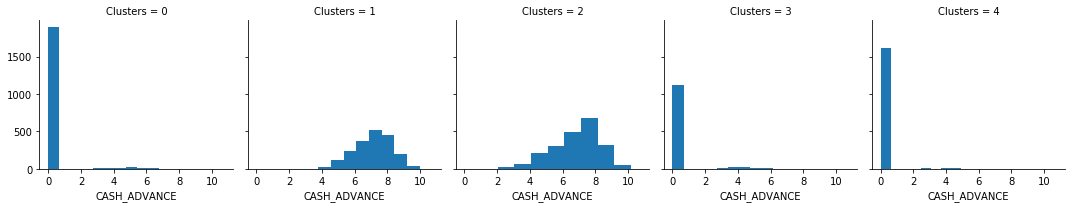

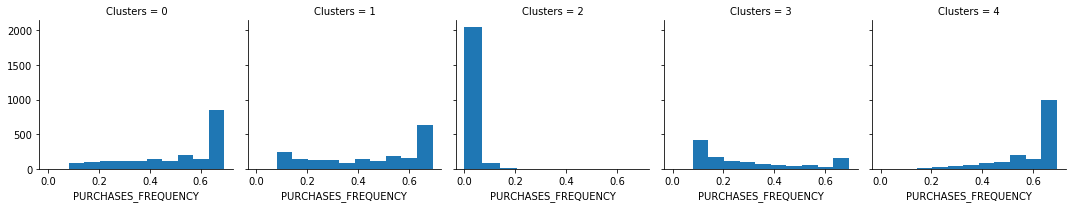

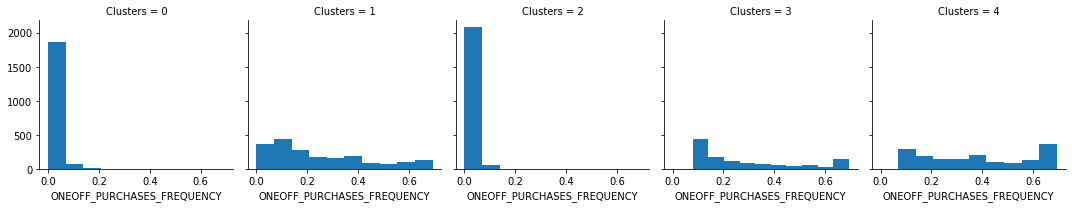

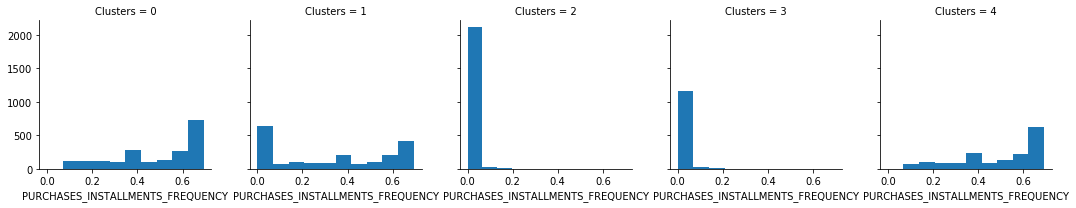

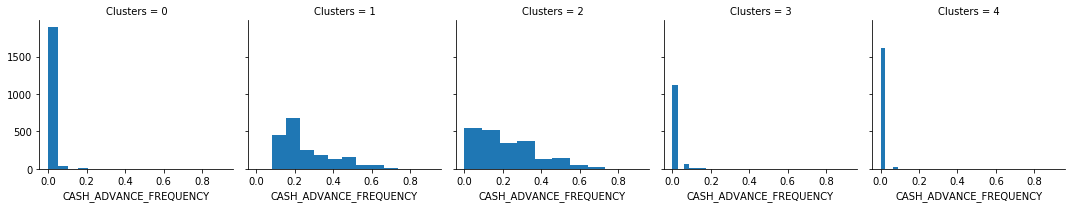

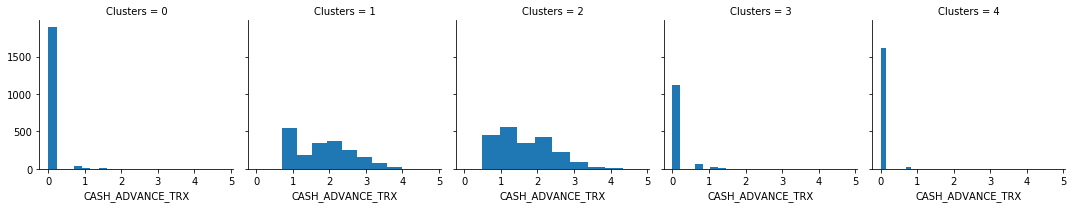

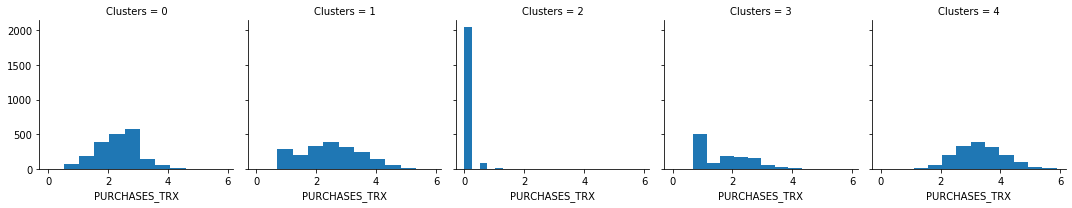

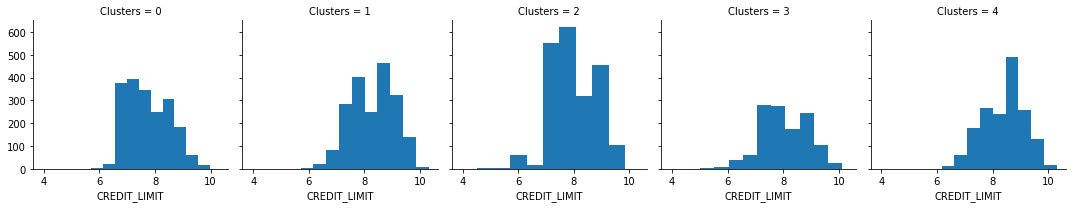

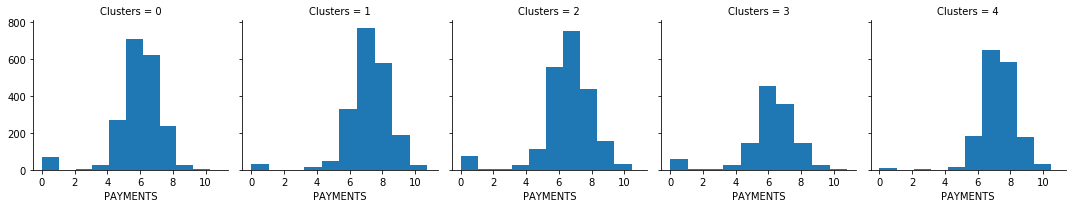

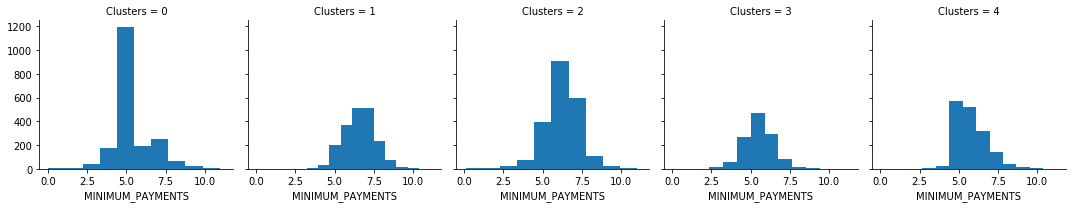

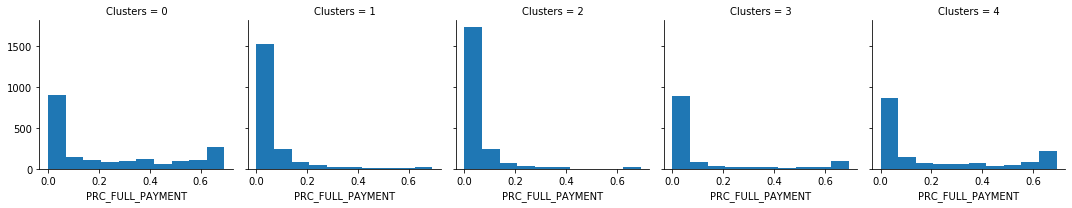

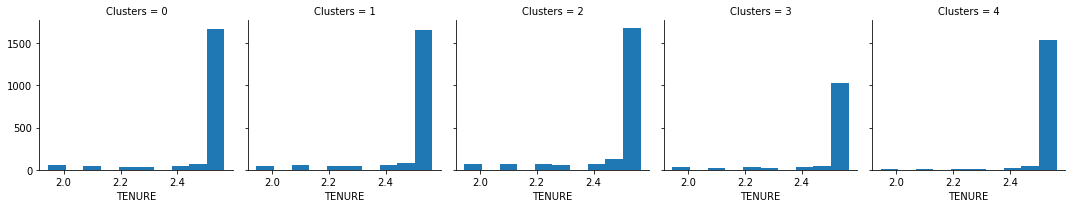

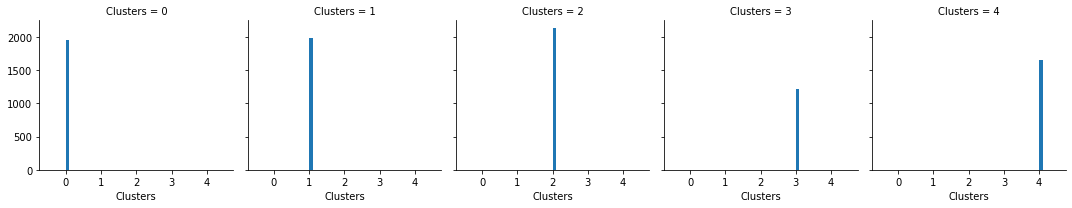

In [29]:
for cluster in df_log:
    grid= sns.FacetGrid(df_log, col='Clusters')
    grid.map(plt.hist, cluster)

In [39]:
interested_cols = [
       'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', "Clusters"
]
df_interested = df_log[interested_cols]

In [40]:
df_interested.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PURCHASES                         8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   CASH_ADVANCE                      8950 non-null   float64
 4   PURCHASES_FREQUENCY               8950 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 7   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 8   CASH_ADVANCE_TRX                  8950 non-null   float64
 9   PURCHASES_TRX                     8950 non-null   float64
 10  Clusters                          8950 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 734.3 KB


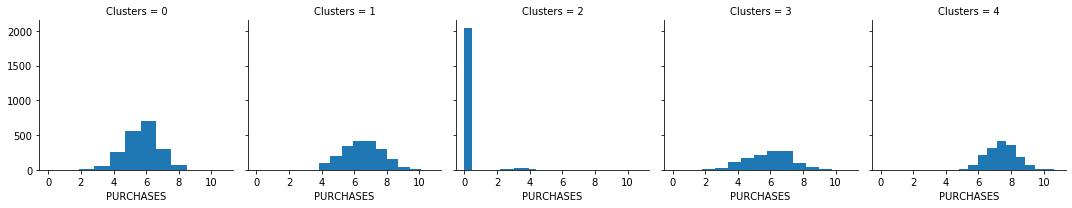

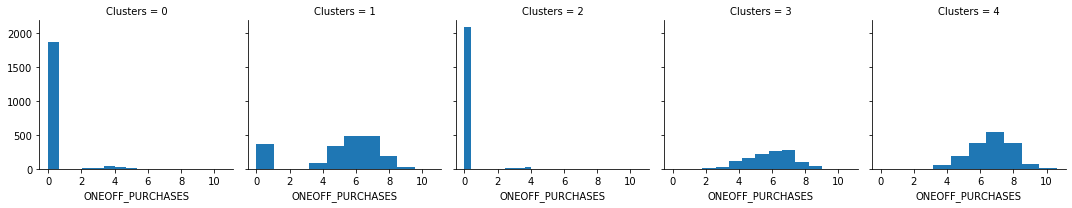

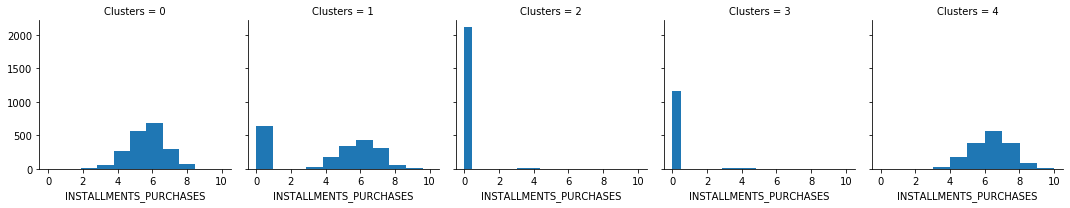

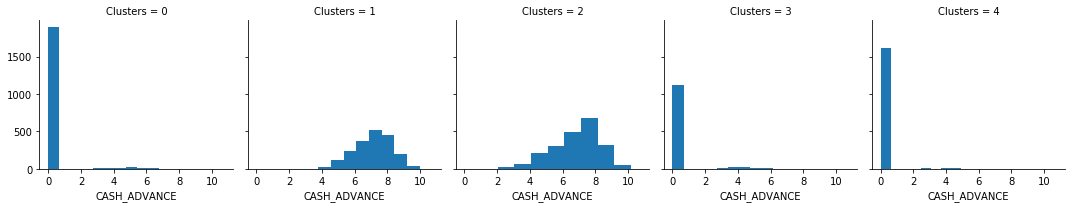

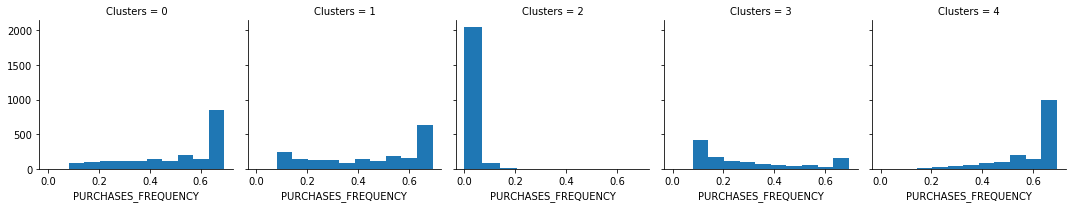

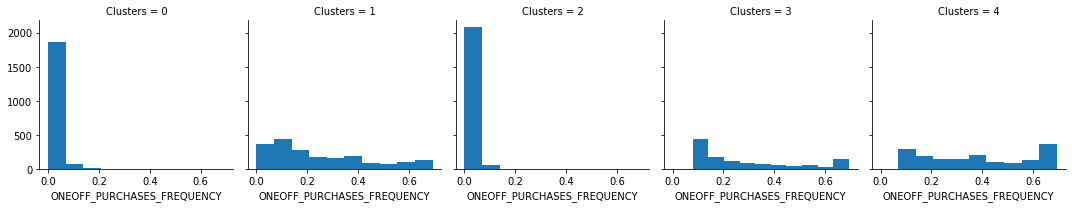

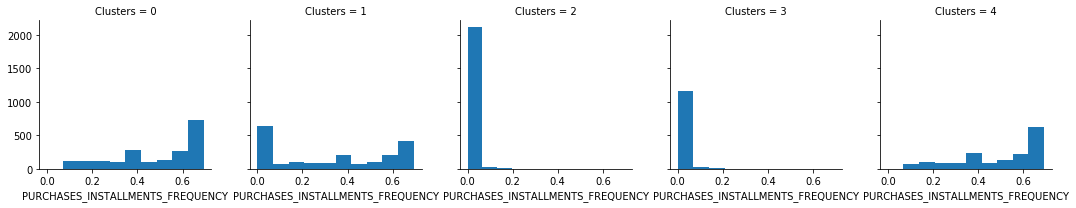

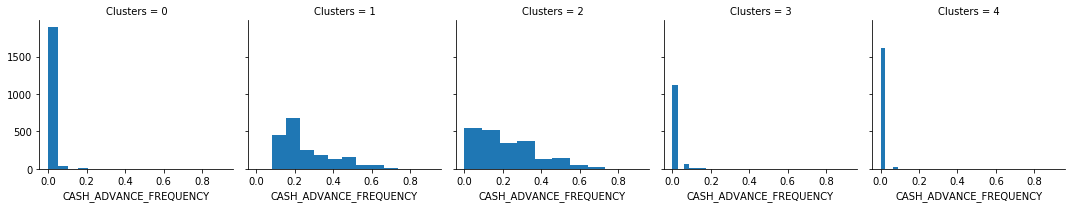

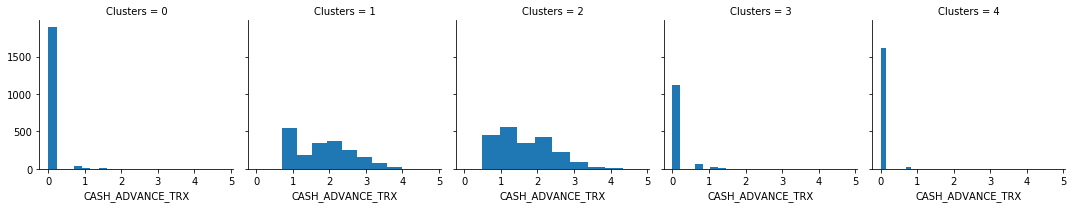

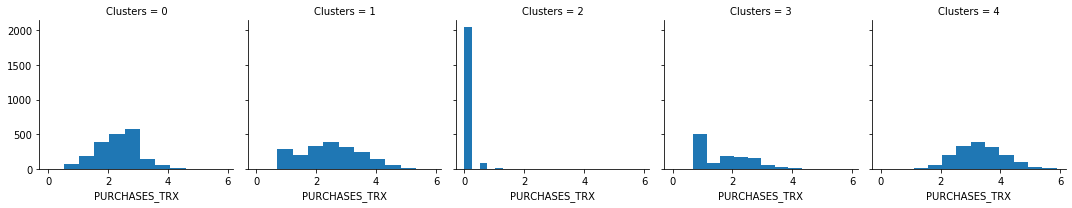

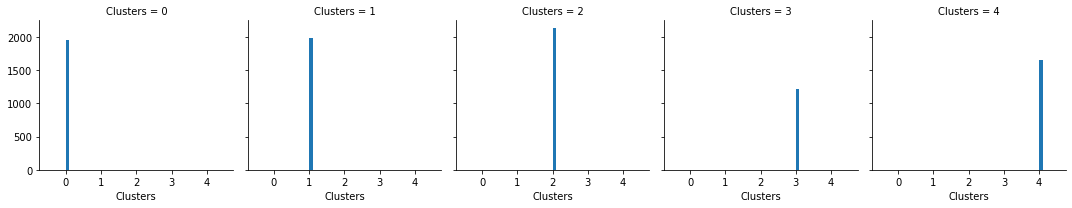

In [42]:
for cluster in df_interested:
    grid = sns.FacetGrid(df_interested, col='Clusters')
    grid.map(plt.hist, cluster)

# Clustering Visualization

In [30]:
pca = PCA(2)
pca.fit(df_log)
X_PCA = pca.transform(df_log)
X_PCA.shape

(8950, 2)

In [31]:
X_vis = np.hstack((X_PCA, selected_model.labels_.reshape(-1, 1)))

In [32]:
X_vis

array([[ 0.84382635, -5.84382561,  0.        ],
       [-8.9300009 ,  1.62984907,  2.        ],
       [ 2.7362187 ,  1.64458181,  3.        ],
       ...,
       [ 1.48715831, -6.23126283,  0.        ],
       [-5.67250952, -5.16601759,  2.        ],
       [ 0.64918703,  3.05087052,  3.        ]])

Text(0.5, 1.0, 'Customers Segementation')

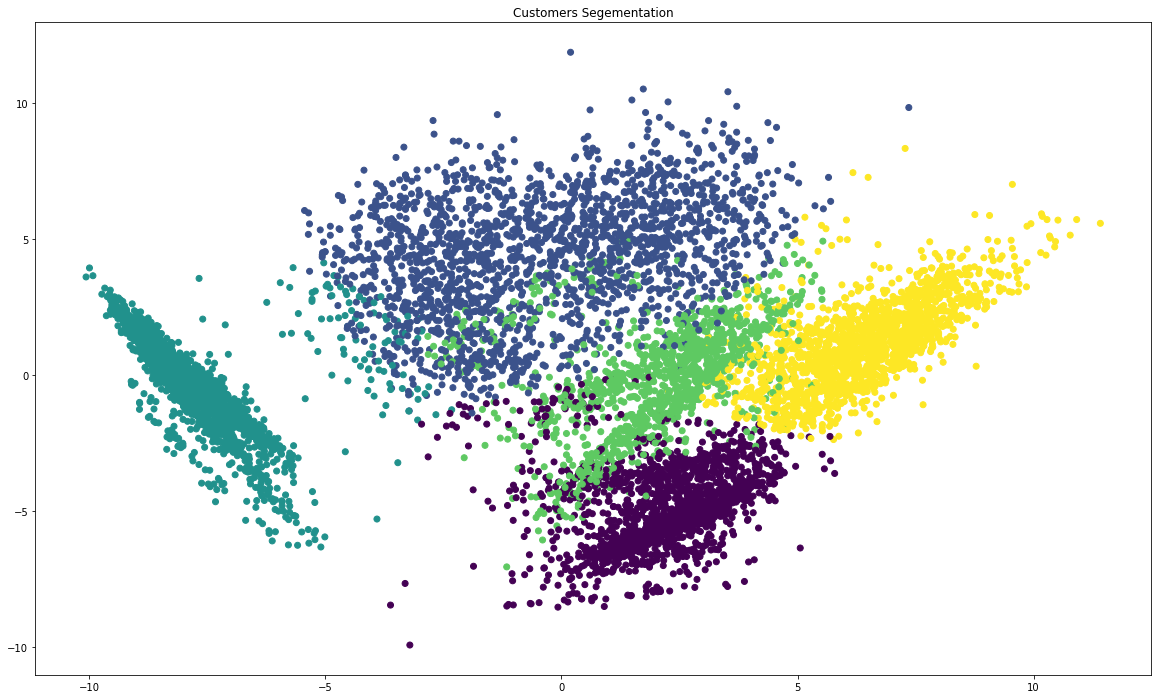

In [33]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(X_vis[:, 0], X_vis[:, 1], c=X_vis[:, 2])
ax.set_title("Customers Segementation")